In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Exercice 1: Classification to predict student admission

### a. Getting the training data

In [164]:
path = '/Users/lorenz/Documents/ML-PW-2018/PW06/'

dataset_train = pd.read_csv( path + 'student-dataset-train.csv',names=['x1','x2','y'])
dataset_test = pd.read_csv(path + 'student-dataset-test.csv',names=['x1','x2','y'])

dataset_train.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


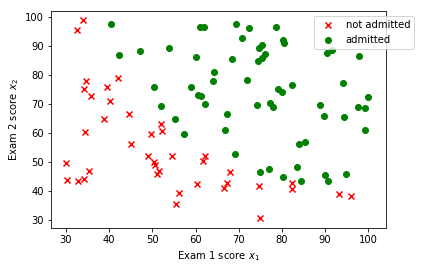

In [94]:
x1_train = dataset_train['x1'].values
x2_train = dataset_train['x2'].values
x1_test = dataset_test['x1'].values
x2_test = dataset_test['x2'].values
X = np.array([np.ones(x1_train.size), dataset_train['x1'].values, dataset_train['x2'].values]).T

y = dataset_train['y'].values
y_test = dataset_test['y'].values


x1_0 = x1_train[y==0]
x1_1 = x1_train[y==1]
x2_0 = x2_train[y==0]
x2_1 = x2_train[y==1]

plt.scatter(x1_0,x2_0,marker='x',color='red',label='not admitted')
plt.scatter(x1_1,x2_1,marker='o',color='green',label='admitted')
plt.xlabel('Exam 1 score $x_1$')
plt.ylabel('Exam 2 score $x_2$')
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

b) Implement a z-norm normalization of the training set. You need to store the normalization values $(μ,σ)$
for later as they will be needed to normalize the test set.

In [165]:
def znorm(data):
    mu = np.mean(data)
    sig = np.var(data)
    return (data - mu) / sig

x1_train_norm = znorm(x1_train)
x2_train_norm = znorm(x2_train)
x1_test_norm = znorm(x1_test)
x2_test_norm = znorm(x2_test)

X_norm_train = np.array([np.ones(x1_train_norm.size), x1_train_norm, x2_train_norm]).T
X_norm_test = np.array([np.ones(x1_test_norm.size), x1_test_norm, x2_test_norm]).T   

f) In a similar way as in PW02 and PW03, implement the gradient ascent with the update
rule :

c) Implement a sigmoid function

$$g(z)=\frac{1}{1+e^{−z}}$$

Use numpy to compute the exp so that your
function can take numpy arrays as input. Plot the sigmoid function.

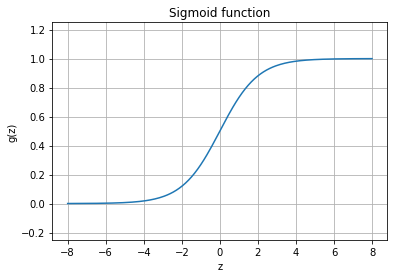

In [96]:
def sigmoid_array(z):  #supporting arrays / this will serve as "g()" 
    return 1 / (1 + np.exp(-z))

z = np.linspace(-8,8,200)
g = sigmoid_array(z)
plt.plot(z,g)
plt.title('Sigmoid function')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.ylim(-0.25,1.25)
plt.grid()
plt.show()

d) Implement the hypothesis function $h_\theta(x)$

In [97]:
def hypothesis(X, theta):
    # X has shape (N,D) and theta has shape (D,).
    # The dot product is then broadcasted to all samples in X.
    return sigmoid_array(X.dot(theta))

e) Implement the objective function
J($\theta$): $$J
(\theta) =\frac{1}{N}\sum_{n=1}^{N} y_n log(h_\theta(x_n))  + (1 − y_n) log(1 − h_\theta(x_n)) $$

In [98]:
def objective(X,y,theta):
    h = hypothesis(X,theta) # h has shape (N,)
    N = X.shape[0]
    tmp = y * np.log(h) + (1-y) * np.log(1-h)
    return np.sum(tmp)/N

f) In a similar way as in PW02 and PW03, implement the gradient ascent with the update
rule :

In [41]:
def gradientAscent(X, y, learning_rate,num_epoch):
    N = X.shape[0]      # number of samples
    D = X.shape[1]      # dimensions
    theta = np.zeros(D) # init thetas to some values - in theory it can be anything
                        # but values at zeros or close to zeros will help convergence
    J = np.zeros(num_epoch)
    
    for itr in range(0,num_epoch):
        J[itr] = objective(X, y, theta)
        h = hypothesis(X,theta)
        loss = y - h
        gradient = loss.dot(X)
        theta = theta + learning_rate * (1.0 / N) * gradient
    return theta, J

In [42]:
theta, J = gradientAscent(X_norm_train, y, 0.001, 2000000)

print("theta_0 =", theta[0])
print("theta_1 =", theta[1])
print("theta_2 =", theta[2])


theta_0 = 0.5365153398291422
theta_1 = 17.735924642704624
theta_2 = 15.938530260988637


g) Test your implementation by observing the evolutions of the objective function $J(\theta)$
during the gradient ascent.

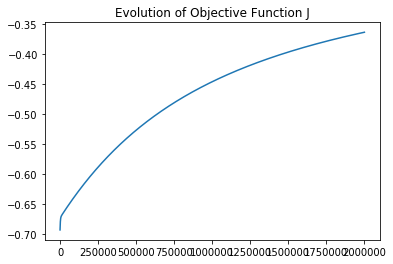

In [43]:
plt.plot(J)
plt.title("Evolution of Objective Function J")
plt.xlabel("Epoch")
plt.ylabel('J')
plt.show()

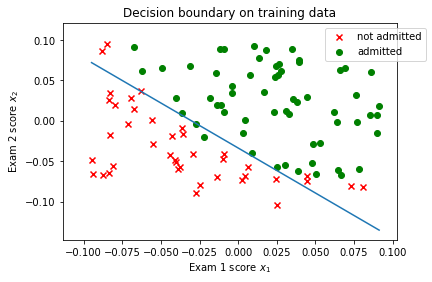

theta :  [ 0.53651534 17.73592464 15.93853026]
# correct  :  91
# missed   :  9
error rate :  9.00 %


In [44]:
x1_0 = x1_train_norm[y==0]
x1_1 = x1_train_norm[y==1]
x2_0 = x2_train_norm[y==0]
x2_1 = x2_train_norm[y==1]

hy = hypothesis(X_norm_train,theta)

plt.scatter(x1_0,x2_0,marker='x',color='red',label='not admitted')
plt.scatter(x1_1,x2_1,marker='o',color='green',label='admitted')
plt.xlabel('Exam 1 score $x_1$')
plt.ylabel('Exam 2 score $x_2$')
plt.title('Decision boundary on training data')
plt.legend(bbox_to_anchor=(1.1, 1))

# plot the decision boundary, i.e. points where theta.x = 0  
x_1 = np.linspace(np.min(x1_train_norm), np.max(x1_train_norm), 100)
x_2 = (-theta[0] - theta[1]*x_1)/theta[2]
plt.plot(x_1, x_2)
plt.show()

num_correct = ((hy >= 0.5) == (y >= 0.5)).sum()
num_missed = y.size - num_correct
error_rate = num_missed * 1.0 / y.size

print('theta : ',theta)
print('# correct  : ', num_correct)
print('# missed   : ', num_missed)
print('error rate :  %2.2f %%'% (error_rate*100.0))


h) Compute the correct classification rate on "ex2-data-test.csv" after convergence assuming you have an estimator of the posterior probabilities with
$$P(y_n = 1\ |\ x_n;\theta) = h\theta(x_n)$$
$$P(y_n= 0\ |\ x_n;\theta) = 1−h_\theta(x_n)$$

i) Draw the decision boundary of your system on top of the scatter plot of the testing data

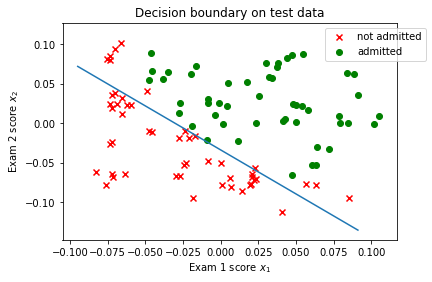

theta :  [ 0.53651534 17.73592464 15.93853026]
# correct  :  90
# missed   :  10
error rate :  10.00 %


In [46]:
x1_0 = x1_test_norm[y_test==0]
x1_1 = x1_test_norm[y_test==1]
x2_0 = x2_test_norm[y_test==0]
x2_1 = x2_test_norm[y_test==1]

plt.scatter(x1_0,x2_0,marker='x',color='red',label='not admitted')
plt.scatter(x1_1,x2_1,marker='o',color='green',label='admitted')
plt.xlabel('Exam 1 score $x_1$')
plt.ylabel('Exam 2 score $x_2$')
plt.title('Decision boundary on test data')
plt.legend(bbox_to_anchor=(1.1, 1))

plt.plot(x_1, x_2) # decision boundary (computed above)

plt.show()

hy = hypothesis(X_norm_test, theta)
num_correct = ((hy >= 0.5) == (y_test >= 0.5)).sum()
num_missed = y.size - num_correct
error_rate = num_missed / y.size


print('theta : ',theta)
print('# correct  : ', num_correct)
print('# missed   : ', num_missed)
print('error rate :  %2.2f %%'% (error_rate*100.0))



j) Compare the performance of the logistic regression system with the ones of previous’s week.

See previous solutions

### b. Optional - Stochastic gradient ascent

In [168]:
import random as rd


def gradient_ascent_stochastic(X,y,learning_rate,num_epoch):
    N, D = X.shape    # number of samples and dimensions
    theta = np.zeros(D)
    J = []
    for itr in range(0,num_epoch):
        i = rd.randint(0, N-1)
        error = y[i] - hypothesis(X[i], theta)
        J.append(objective(X, y, theta))
        for j in range(0,D):
            delta = error * X[i,j]
            theta[j] = theta[j] + learning_rate * delta / N
    return theta, J


In [169]:
theta_stoch, J = gradient_ascent_stochastic(X_norm_train, y, 1, 2000000)

print(theta_stoch)


[ 1.15478345 51.00418624 44.94000293]


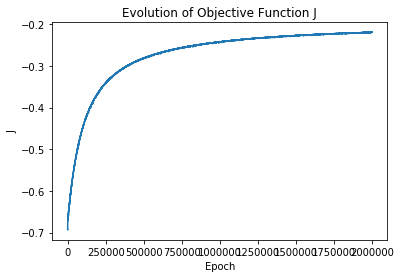

In [170]:
plt.plot(J)
plt.title("Evolution of Objective Function J")
plt.xlabel("Epoch")
plt.ylabel('J')
plt.show()

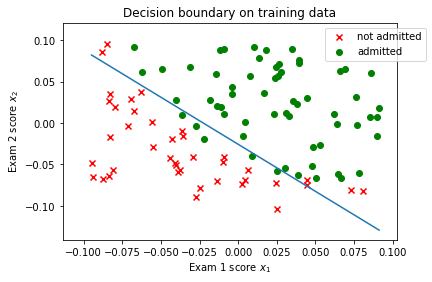

In [171]:
x1_0 = x1_train_norm[y==0]
x1_1 = x1_train_norm[y==1]
x2_0 = x2_train_norm[y==0]
x2_1 = x2_train_norm[y==1]

plt.scatter(x1_0,x2_0,marker='x',color='red',label='not admitted')
plt.scatter(x1_1,x2_1,marker='o',color='green',label='admitted')
plt.xlabel('Exam 1 score $x_1$')
plt.ylabel('Exam 2 score $x_2$')
plt.title('Decision boundary on training data')
plt.legend(bbox_to_anchor=(1.1, 1))

x_1 = np.linspace(np.min(x1_train_norm), np.max(x1_train_norm), 100)
x_2 = (-theta_stoch[0] - theta_stoch[1]*x_1)/theta_stoch[2]

plt.plot(x_1, x_2) # decision boundary (computed above)

plt.show()

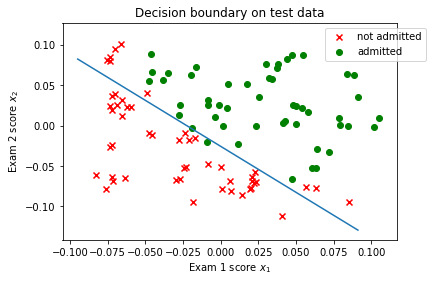

theta :  [ 1.15478345 51.00418624 44.94000293]
# correct  :  90
# missed   :  10
error rate :  10.00 %


In [173]:
x1_0 = x1_test_norm[y_test==0]
x1_1 = x1_test_norm[y_test==1]
x2_0 = x2_test_norm[y_test==0]
x2_1 = x2_test_norm[y_test==1]

plt.scatter(x1_0,x2_0,marker='x',color='red',label='not admitted')
plt.scatter(x1_1,x2_1,marker='o',color='green',label='admitted')
plt.xlabel('Exam 1 score $x_1$')
plt.ylabel('Exam 2 score $x_2$')
plt.title('Decision boundary on test data')
plt.legend(bbox_to_anchor=(1.1, 1))

plt.plot(x_1, x_2) # decision boundary (computed above)

plt.show()

hy = hypothesis(X_norm_test, theta_stoch)
num_correct = ((hy >= 0.5) == (y_test >= 0.5)).sum()
num_missed = y.size - num_correct
error_rate = num_missed / y.size


print('theta : ', theta_stoch)
print('# correct  : ', num_correct)
print('# missed   : ', num_missed)
print('error rate :  %2.2f %%'% (error_rate*100.0))

I needed to set the learning rate (alpha) very high. Then we can reach a good result. 

### c. Logistic regression classifier with non-linear decision boundary

Redo the experiments of 2.a by increasing the complexity of the model in order to have a
non-linear decision boundary :
$$h_\theta(x) = g(\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_1^2+\theta_4x_2^2+\theta_5x_1x_2+...)$$

In [180]:

X_train_norm_multi = np.array([np.ones(x1_train_norm.size),x1_train_norm,x2_train_norm,x1_train_norm**2,
                                x2_train_norm**2, x1_train_norm*x2_train_norm]).T

tmp_result = gradientAscent(X_train_norm_multi, y, 1, 2000000)

theta = tmp_result[0]
accJ = tmp_result[1]

[   4.76577877  121.51843795  114.39759918 -262.68202506 -253.92422367
  239.99247591]


/Users/lorenz/.local/share/virtualenvs/lorenz-VPug_12e/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


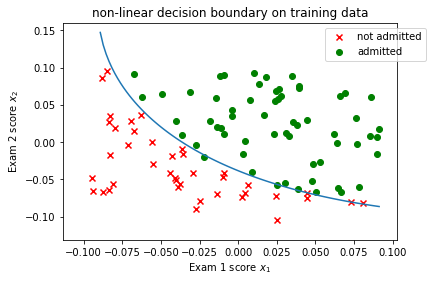

In [187]:
print(theta)

x1_0 = x1_train_norm[y==0]
x1_1 = x1_train_norm[y==1]
x2_0 = x2_train_norm[y==0]
x2_1 = x2_train_norm[y==1]

plt.scatter(x1_0,x2_0,marker='x',color='red',label='not admitted')
plt.scatter(x1_1,x2_1,marker='o',color='green',label='admitted')
plt.xlabel('Exam 1 score $x_1$')
plt.ylabel('Exam 2 score $x_2$')
plt.title('non-linear decision boundary on training data')
plt.legend(bbox_to_anchor=(1.1, 1))

x_2_non = np.linspace(np.min(x1_train_norm), np.max(x1_train_norm), 100)
a = theta[4]
b = theta[2] + theta[5]*x_2_non
c = theta[0] + theta[1]*x_2_non + theta[3]*(x_2_non**2)
delta = b**2 - 4*a*c
y_2_non = (-b + delta**0.5) / (2*a)


plt.show()



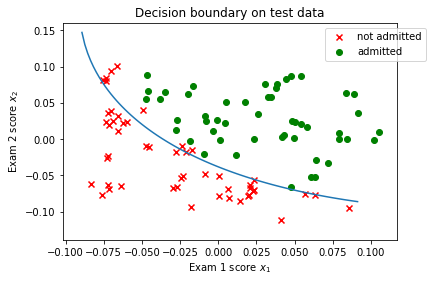

theta :  [   4.76577877  121.51843795  114.39759918 -262.68202506 -253.92422367
  239.99247591]
error rate :  96.00 %


In [193]:
x1_0 = x1_test_norm[y_test==0]
x1_1 = x1_test_norm[y_test==1]
x2_0 = x2_test_norm[y_test==0]
x2_1 = x2_test_norm[y_test==1]

plt.scatter(x1_0,x2_0,marker='x',color='red',label='not admitted')
plt.scatter(x1_1,x2_1,marker='o',color='green',label='admitted')
plt.xlabel('Exam 1 score $x_1$')
plt.ylabel('Exam 2 score $x_2$')
plt.title('Decision boundary on test data')
plt.legend(bbox_to_anchor=(1.1, 1))

plt.plot(x_2_non, y_2_non) # decision boundary (computed above)
plt.show()

hy = hypothesis(X, theta)

classification = ((hy >= 0.5) == (y >= 0.5)).sum()
error_rate = classification * 1.0 / y.size


print('theta : ', theta)

print('error rate :  %2.2f %%'% (error_rate*100.0))

### d. Using SciKit Learn

In [164]:
from sklearn.linear_model import SGDClassifier

path = '/Users/lorenz/Documents/ML-PW-2018/PW06/'

dataset = pd.read_csv( path + 'student-dataset-train.csv',names=['x1','x2','y'])

x1 = dataset['x1'].values
x2 = dataset['x2'].values
y = dataset['y'].values

X_train = [] # bring the data in a form sklearn can read
for i in range(len(x1)):
    X_train.append([x1[i],x2[i]])



In [171]:

clf = SGDClassifier(loss='log', max_iter=200000)
clf.fit(X_train, y)

X_test = [] # bring the data in a form sklearn can read
for i in range(len(x1)):
    X_test.append([x1[i],x2[i]])

prediction = clf.predict(X_test)

errors = 0

for i in range(len(prediction)):
    if prediction[i] != y[i]:
        errors += 1

print('Total erors: ' + str(errors))
print('Error rate: ' + str(errors/len(X_test)))

Total erors: 10
error rate: 0.1


We see, that this reaches 10% and our implementation 11%. So we need indeed a nice job. We can assume sklearn did it correct :D